# Import Libraries

In [1]:
import os
import copy

# datetime
from datetime import datetime, timedelta
import time

# linear algebra
import numpy as np 
import scipy

# data processing
import pandas as pd 
from collections import defaultdict

# data visualization
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
sns.set()

In [2]:
BASE_PATH = '/content/drive'
PROJECT_PATH = os.path.join(BASE_PATH, "MyDrive","2021-09 Fall Semester","EECS 6893 Big Data Analytics","Projects", "Big Data Analytics Project")
os.chdir(PROJECT_PATH)

# Load Data

In [6]:
!pip3 install pickle5


     |████████████████████████████████| 256 kB 6.5 MB/s 


In [8]:
import pickle5 as pickle

In [12]:
with open('forecast_data/forecast_res-2021-12-09.pkl', "rb") as fh:
  data = pickle.load(fh)

In [13]:
data

,ds,zone_name,y,yhat,yhat_upper,yhat_lower,trend,holidays,yearly,daily,weekly
0,2010-01-01 00:00:00,CAPITL,12518.099609,12613.607422,16561.296875,9120.713867,14812.665039,-0.095238,0.056130,-0.130641,0.021291
1,2010-01-01 01:00:00,CAPITL,13092.299805,11989.854492,15666.069336,8186.646973,14813.125000,-0.095238,0.056180,-0.172363,0.020830
2,2010-01-01 02:00:00,CAPITL,12562.200195,11588.465820,15455.477539,7901.891602,14813.585938,-0.095238,0.056229,-0.199018,0.020314
3,2010-01-01 03:00:00,CAPITL,12101.299805,11466.584961,15152.679688,7877.807129,14814.046875,-0.095238,0.056278,-0.206743,0.019738
4,2010-01-01 04:00:00,CAPITL,11989.799805,11715.201172,15239.740234,8260.172852,14814.506836,-0.095238,0.056327,-0.189391,0.019095
...,...,...,...,...,...,...,...,...,...,...,...
1148802,2021-11-30 20:00:00,MILLWD,NaN,4885.288086,6073.982422,3612.519531,4080.098145,0.000000,0.001962,0.172233,0.023151
1148803,2021-11-30 21:00:00,MILLWD,NaN,4621.094238,5895.692383,3381.287354,4080.104492,0.000000,0.002109,0.107065,0.023418
1148804,2021-11-30 22:00:00,MILLWD,NaN,4264.531250,5530.609863,2964.978516,4080.110840,0.000000,0.002257,0.019235,0.023708
1148805,2021-11-30 23:00:00,MILLWD,NaN,3896.691162,5133.661621,2598.658447,4080.117188,0.000000,0.002405,-0.071380,0.024019


# Visualization

In [15]:
test_df = data[(data['zone_name']=='N.Y.C.')].dropna().reset_index(drop=True)


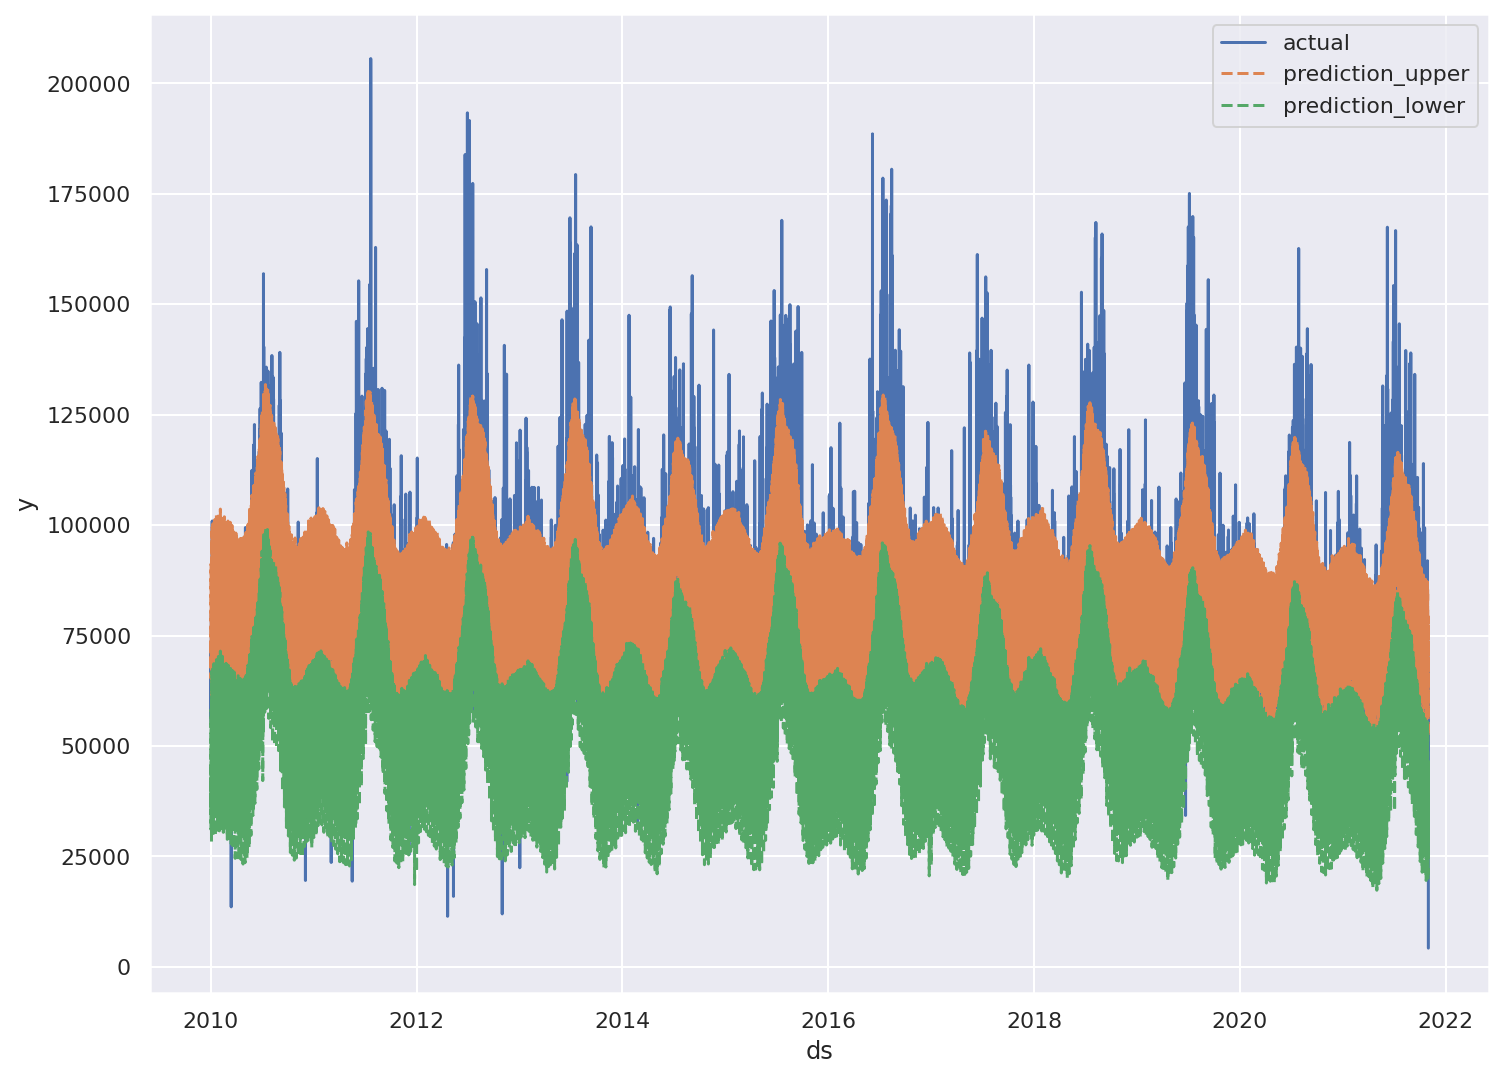

In [19]:
# Columns ds, y, yhat, yhat_upper, yhat_lower

plot_df = test_df[['ds', 'y', 'yhat_upper', 'yhat_lower']]
# plot_df.melt(id_vars=['ds'])
plt.figure(figsize=(12,9))
sns.lineplot(data=plot_df, x='ds', y='y', label='actual')
sns.lineplot(data=plot_df, x='ds', y='yhat_upper', linestyle='--', label='prediction_upper')
sns.lineplot(data=plot_df, x='ds', y='yhat_lower', linestyle='--', label='prediction_lower')